In [1]:
%%html
<!-- Not content, but for better presentation styles -->
<style>
.rise-enabled .rendered_html table.dataframe {
    font-size: 16px;
}
.rendered_html code {
    background: #EFEFEF;
    border: 1px solid #CCC;
    padding: 1px 5px;
    border-radius: 1px;
    font-size: 1.0em;
}
.rise-enabled .fa-times-circle:before,
.rise-enabled .fa-question:before,
.rise-enabled aside.controls {
    opacity: 0.1;
}
.rise-enabled a,
.rise-enabled a:active,
.rise-enabled a:hover,
.rise-enabled a:visited,
.rise-enabled :link {
    text-decoration: none;
    color: #A68910;
}    

.small {
    font-size: 0.8em;
}

.reference {
    height: 100%;
    margin: 8px;
    vertical-align: bottom;
    text-align: left;
    font-size: 0.75em;
}

.container {
    width: 99% !important;
}

.rendered_html {
    font-size: 0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

.rise-enabled {
    #background-color: azure !important;
    font-size: 125% !important;
    background-image: url(./images/Logo_TUD.png);#, linear-gradient(30deg, #7ab8ec, white 75%, white);
    background-size: 50px 50px;
    background-position: right 50px top 50px;
    background-repeat: no-repeat;
    background-origin: content-box;
    background-padding: 50px 0px;
}

.rise-enabled::before{
    font-size: 1.0em;
    content: "Walter de Back  -  Deep Learning for Biomedicine with Keras  -  TU Dresden";
    position: relative;
    top: 50px;
    display: block;
    text-align: center;
    color: #000000;
    #color: #45c8fc;
}


</style>

In [2]:
%matplotlib inline
import pylab as plt
import numpy as np

# Deep Learning for Biomedicine with Keras
## Deep learning in practice



<img src="./images/segmentation.png" width="30%" align="right">


[*Walter de Back*](http://walter.deback.net)

Institute for Medical Informatics and Biometry (IMB)  
*"Carl Gustav Carus"* Faculty of Medicine  
TU Dresden

[GitLab repo](https://gitlab.com/wdeback/dl-keras-tutorial)

## Table of concepts

- Example
  - XOR
- Representation
  - one-hot
  - float32
- Data
  - normalization
  - augmentation

- Initialization
  - Zero, random, He/Xavier/Glorot

- Model validation
  - training, validation and test sets
    - trainind data: used to fit the models
    - validation: used to estimate prediction error for **model selection**
    - test data: used to estimate prediction/generalization error of **final model**
      
  - generalization, over/underfitting
  - k-fold cross-validation
  - http://scikit-learn.org/stable/modules/learning_curve.html

- Repository:  
`gitlab.com/wdeback/dl-keras-tutorial`

- Clone repo:  
`git clone git@gitlab.com:wdeback/dl-keras-tutorial.git`

# Deep learning in practice

- practical exercises in deep learning
- focus on image analysis with CNNs
- using python stack: 
    - `scikit-learn`, `skimage`, `tensorflow` and `keras`
- tutorial in repo: 
    - `gitlab.com/wdeback/dl-keras-tutorial.git`


# Learning XOR

<img src="./images/XOR_nonseparable.png" width="30%" align="right">
<img src="./images/XOR.png" width="12%" align="right">

- XOR = Inequality function
    - output true if the inputs are not alike
- Not linearly separable
- i.e. linear classifier cannot learn this




## Learning XOR

<img src="./images/XOR_MLP.jpg" width="30%" align="right">

- Multilayer perceptron (MLP)
- Simplest neural network
- Nonlinear classifier


## Learning XOR with `keras`

In [64]:
# import modules
import numpy as np 
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation
from keras.optimizers import SGD

In [65]:
# data: X = input, y = output
X = np.array([[0,0],[0,1],[1,0],[1,1]], np.float32)
y = np.array([  [0],  [1],  [1],  [0]], np.float32)

In [66]:
# define MLP network
i = Input(shape=(2,))
h = Dense(16, activation='tanh', use_bias=False)(i)
o = Dense(1, activation='sigmoid', use_bias=False)(h)
model = Model(inputs=[i], outputs=[o])

In [67]:
# compile model and train
model.compile(loss='mse', optimizer=SGD(lr=0.2))
history = model.fit(X, y, batch_size=1, epochs=2000, verbose=0)

## Predicting XOR with `keras`

In [68]:
# predict
pred = model.predict(X).round()
print('Prediction:  ', pred.T)
print('Ground truth:', y.T)

Prediction:   [[0. 1. 1. 0.]]
Ground truth: [[0. 1. 1. 0.]]


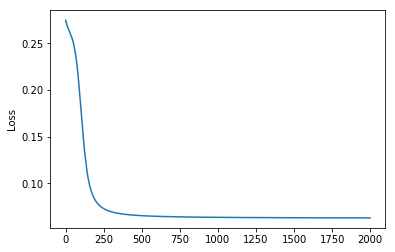

In [69]:
%matplotlib inline
import pylab as plt 
_ = plt.plot(history.history['loss'], label='loss')
_ = plt.ylabel('Loss')